# Chapter 3
# Data formats and handling
_Version: February 14, 2022, see_ [PyEcon.org](https://pyecon.org).

The package pandas is a free software library for Python including the following functions:
- Data manipulation and analysis
- DataFrame objects and Series
- Export and import data from files and web
- Handling of missing data

Provides high-performance data structures and data analysis tools.

## Section 3.1
## Pandas package

### Motivation

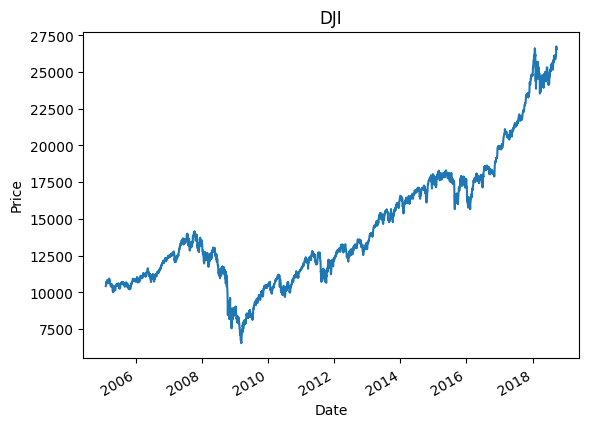

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
dow = pd.read_csv("data/dji.csv", index_col=0, parse_dates=True)
close = dow["Close"]
close.plot(ax=ax)
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.set_title("DJI")
fig.savefig("out/dji.pdf", format="pdf")

## Section 3.2
## Series

### Importing Pandas and creating a Series

In [ ]:
import numpy as np
import pandas as pd

obj = pd.Series([2, -5, 9, 4])
obj

### Series indexing vs. Numpy indexing

In [ ]:
obj2 = pd.Series([2, -5, 9, 4], index=["a", "b", "c", "d"])
npobj = np.array([2, -5, 9, 4])
obj2
obj2["b"]
npobj[1]

### Series creation from Numpy arrays

In [ ]:
npobj = np.array([2, -5, 9, 4])
obj2 = pd.Series(npobj, index=["a", "b", "c", "d"])
obj2

### Series from dicts

In [3]:
dictdata = {"Göttingen": 117665, "Hamburg": 28920,
            "Hannover": 532163, "Berlin": 3574830}
obj3 = pd.Series(dictdata)
obj3

Göttingen     117665
Northeim       28920
Hannover      532163
Berlin       3574830
dtype: int64

### Series properties

In [ ]:
obj.values
obj.index
obj2.index

### Series manipulation

In [ ]:
obj2[["c", "d", "a"]]
obj2[obj2 < 0]

### Series functions

In [ ]:
obj2 * 2
np.exp(obj2)["a":"c"]
"c" in obj2

### Series manipulation

In [ ]:
obj4["Hamburg"] = 1900000
obj4
obj4[["Berlin", "Hannover"]] = [3600000, 1100000]
obj4

### NaN

In [ ]:
pd.isnull(obj4)
pd.notnull(obj4)

### Align data

In [ ]:
obj3 + obj4

### Naming

In [ ]:
obj4.name = "population"
obj4.index.name = "city"
obj4

## Section 3.3
## DataFrame

### Creating a DataFrame

In [6]:
data = {"company": ["Daimler", "E.ON", "Siemens", "BASF", "BMW"],
        "price": [69.2, 8.11, 110.92, 87.28, 87.81],
        "volume": [4456290, 3667975, 3669487, 1778058, 1824582]}
frame = pd.DataFrame(data)
frame

,company,price,volume
0,Daimler,69.20,4456290
1,E.ON,8.11,3667975
2,Siemens,110.92,3669487
3,BASF,87.28,1778058
4,BMW,87.81,1824582


### Print DataFrame

In [7]:
frame2 = pd.DataFrame(data, columns=["company", "volume",
                                     "price", "change"])
frame2

,company,volume,price,change
0,Daimler,4456290,69.20,NaN
1,E.ON,3667975,8.11,NaN
2,Siemens,3669487,110.92,NaN
3,BASF,1778058,87.28,NaN
4,BMW,1824582,87.81,NaN


### Add data to DataFrame

In [8]:
frame2["change"] = [1.2, -3.2, 0.4, -0.12, 2.4]
frame2["change"]

0    1.20
1   -3.20
2    0.40
3   -0.12
4    2.40
Name: change, dtype: float64

### Indexing DataFrames

In [9]:
frame2[["company", "change"]]

,company,change
0,Daimler,1.20
1,E.ON,-3.20
2,Siemens,0.40
3,BASF,-0.12
4,BMW,2.40


### DataFrame delete column

In [10]:
del frame2["volume"]
frame2
frame2.columns

Index(['company', 'price', 'change'], dtype='object')

### Naming properties

In [11]:
frame2.index.name = "number:"
frame2.columns.name = "feature:"
frame2

feature:,company,price,change
number:,,,
0,Daimler,69.20,1.20
1,E.ON,8.11,-3.20
2,Siemens,110.92,0.40
3,BASF,87.28,-0.12
4,BMW,87.81,2.40


### Reindexing

In [12]:
frame3 = frame.reindex([0, 2, 3, 4])
frame3

,company,price,volume
0,Daimler,69.20,4456290
2,Siemens,110.92,3669487
3,BASF,87.28,1778058
4,BMW,87.81,1824582


### Filling missing values

In [15]:
frame4 = frame.reindex(index=[0, 2, 3, 4, 5], fill_value=0,
                       columns=["company", "price", "market cap"])
frame4
frame4 = frame.reindex(index=[0, 2, 3, 4], fill_value=np.nan,
                       columns=["company", "price", "market cap"])
frame4

,company,price,market cap
0,Daimler,69.20,NaN
2,Siemens,110.92,NaN
3,BASF,87.28,NaN
4,BMW,87.81,NaN


### Filling NaN

In [ ]:
frame4[:3]
frame4.fillna(1000000, inplace=True)
frame4[:3]

### Dropping index

In [ ]:
frame5 = frame
frame5
frame5.drop([1, 2])

### Dropping column

In [ ]:
frame5[:2]
frame5.drop("price", axis=1)[:3]
frame5.drop(2, axis=0)

### Indexing

In [ ]:
frame
frame[2:]

### Indexing

In [ ]:
frame6 = pd.DataFrame(data, index=["a", "b", "c", "d", "e"])
frame6
frame6["b":"d"]

### Selection with loc and iloc

In [ ]:
frame6.loc["c", ["company", "price"]]
frame6.iloc[2, [0, 1]]

### Selection with loc and iloc

In [ ]:
frame6.loc[["c", "d", "e"], ["volume", "price", "company"]]
frame6.iloc[2:, ::-1]

### Multiindex

In [ ]:
ind = [["a", "a", "a", "b", "b"], [1, 2, 3, 1, 2]]
frame6 = pd.DataFrame(np.arange(15).reshape((5, 3)), index=ind,
                      columns=["first", "second", "third"])
frame6
frame6.index.names = ["index1", "index2"]
frame6.index

### Selecting of a multiindex

In [ ]:
frame6.loc["a"]
frame6.loc["b", 1]

### Series and DataFrames

In [ ]:
frame7 = frame[["price", "volume"]]
frame7.index = ["Daimler", "E.ON", "Siemens", "BASF", "BMW"]
series = frame7.iloc[2]
frame7
series

### Operations between Series and DataFrames down the rows

In [ ]:
frame7 + series

### Pandas vs Numpy

In [ ]:
nparr = np.arange(12.).reshape((3, 4))
row = nparr[0]
nparr - row

### Numpy functions on DataFrames

In [ ]:
frame7[:2]
frame7.apply(np.mean)
frame7.apply(np.sqrt)[:2]

### Groupby

In [ ]:
vote = pd.read_csv("data/vote.csv")[["Party", "Member", "Vote"]]
vote.head()

### Groupby

In [ ]:
res = vote.groupby(["Party", "Vote"]).count()
res

## Section 3.4
## Import/Export data

### Read comma-separated values

In [ ]:
df = pd.read_csv("data/ex1.csv")
df

### Read table values

In [ ]:
df = pd.read_table("data/tab.txt", sep="|")
df

### Read CSV and header settings

In [ ]:
df = pd.read_csv("data/ex2.csv", header=None)
df

### Read CSV and header names

In [ ]:
df = pd.read_csv("data/ex2.csv",
                 names=["a", "b", "c", "d", "hello"])
df

### Read CSV and specify index

In [ ]:
df = pd.read_csv("data/ex2.csv",
                 names=["a", "b", "c", "d", "hello"],
                 index_col="hello")
df

### Read CSV and choose rows

In [ ]:
df = pd.read_csv("data/ex3.csv", skiprows=[1, 3])
df

### Write to CSV

In [ ]:
df = pd.read_csv("data/ex3.csv", skiprows=[1, 3])
df.to_csv("out/out1.csv")

### Write to CSV and settings

In [ ]:
df = pd.read_csv("data/ex3.csv", skiprows=[1, 3])
df.to_csv("out/out2.csv", index=False, header=False)

### Write to CSV and specify header

In [ ]:
df = pd.read_csv("data/ex3.csv", skiprows=[1, 3, 4])
df.to_csv("out/out3.csv", index=False,
          header=["a", "b", "c", "d", "e"])

### Reading Excel

In [ ]:
xls_frame = pd.read_excel("data/goog.xls")

### Excel as a DataFrame

In [ ]:
xls_frame[["Adj Close", "Volume", "High"]]

### Import pandas-datareader

In [ ]:
from pandas_datareader import data

### Get data of Ford

In [ ]:
ford = data.DataReader("F", "yahoo", "2020-01-01", "2020-01-31")
ford.head()[["Close", "Volume"]]

### Explore Ford dataset

In [ ]:
ford.index
ford.loc["2020-01-28"]

### Download and explore SAP data

In [ ]:
sap = data.DataReader("SAP", "yahoo", "2020-01-01", "2020-06-30")
sap[25:27]
sap.loc["2020-03-09"]

### Eurostat

In [ ]:
population = data.DataReader("tps00001", "eurostat", "2010-01-01",
                             "2020-01-01")
population.columns
population["Population on 1 January - total", "France"][-5:]

### Beautiful Soup

In [ ]:
from bs4 import BeautifulSoup
import requests
url = "www.uni-goettingen.de/de/applied-econometrics/412565.html"
r = requests.get("https://" + url)
d = r.text
soup = BeautifulSoup(d, "lxml")
soup.title

### Bollinger

In [ ]:
sap = data.DataReader("SAP", "yahoo", "2019-01-01", "2020-08-31")
sap.index = pd.to_datetime(sap.index)
boll = sap["Close"].rolling(window=20, center=False).mean()
std = sap["Close"].rolling(window=20, center=False).std()
upp = boll + std * 2
low = boll - std * 2
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
boll.plot(ax=ax, label="20 days Rolling mean")
upp.plot(ax=ax, label="Upper Band")
low.plot(ax=ax, label="Lower Band")
sap["Close"].plot(ax=ax, label="SAP Price")
ax.legend(loc="best")
fig.savefig("out/boll.pdf")